In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Mega_Case_Study/Credit_Card_Applications.csv')

In [5]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [8]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [10]:
from minisom import MiniSom

In [11]:
som = MiniSom(x = 10,y = 10,input_len = 15,sigma = 1.0,learning_rate = 0.5)

In [12]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

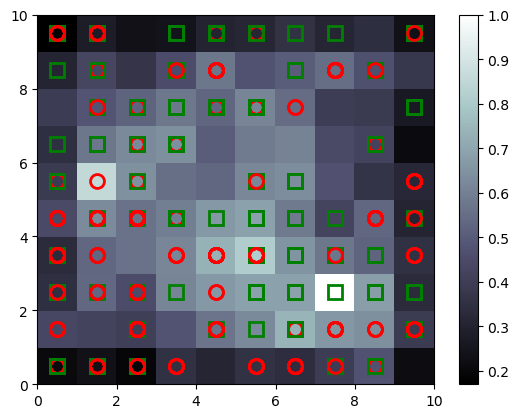

In [13]:
from pylab import bone, pcolor, colorbar, show, plot
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markeredgewidth=2,
         markersize=10,)

In [16]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(3,6)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [26]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15795527
15802869
15750545
15768600
15748552
15757467
15682576
15642391
15815443
15748432
15598802
15708714
15635244
15771856
15648876
15679394
15696287
15808023
15808386
15698749
15786539
15581700
15629133
15604963


In [23]:
customers = dataset.iloc[:,1:].values

In [24]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [29]:
import tensorflow as tf

In [33]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, kernel_initializer='uniform',activation='relu',input_dim=15))
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 2s 2ms/step - loss: 0.4595 - accuracy: 0.9638
Epoch 2/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1844 - accuracy: 0.9652
Epoch 3/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1303 - accuracy: 0.9652
Epoch 4/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1104 - accuracy: 0.9652
Epoch 5/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1002 - accuracy: 0.9652
Epoch 6/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9652
Epoch 7/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0864 - accuracy: 0.9652
Epoch 8/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.9652
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9652
Epoch 10/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9652

In [36]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 2ms/step


In [37]:
print(y_pred)

[[1.57591330e+07 7.20268436e-05]
 [1.56809010e+07 7.25690115e-05]
 [1.57682950e+07 8.29316050e-05]
 ...
 [1.57486490e+07 3.26588273e-01]
 [1.58083860e+07 3.26588273e-01]
 [1.57574670e+07 3.26588273e-01]]
